#### Home work 9 - Skills for Data Management

- Eduard Rednic

Use the Titanic dataset.

Tasks:

- Create a frequency table showing how many men and women survived vs. did not survive. Use crosstab. Show the table.
- Visualize the survival distribution for each gender using a pie chart. Use appropriate labels and title.
- Compute the mean survival rate grouped by class and sex. Use pivot table. Show the table.
- Plot a grouped bar chart showing the proportion of survival by class. Use appropriate x and y labels, legend and title.


Return your answer in HTML format (Jupyter Notebook coverted to HTML).

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot") # tried something new

# Loading dataset

titanic = sns.load_dataset("titanic")

titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
# Making the frequency table

frequency_table = pd.crosstab(titanic["sex"], titanic["survived"])

# Decided to rename columns to be easier to read

frequency_table.columns = ["Did not survive", "Survived"]

freq_table

,Did not survive,Survived
sex,,
female,81,233
male,468,109


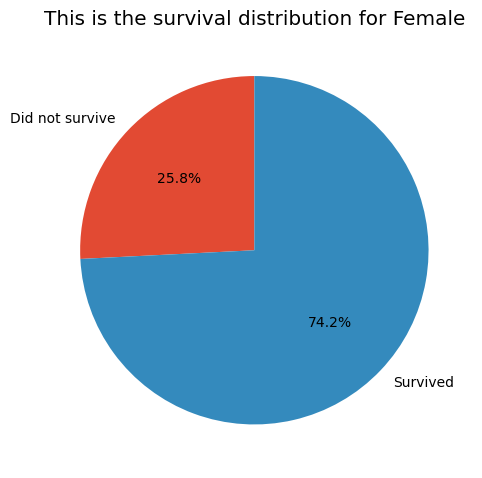

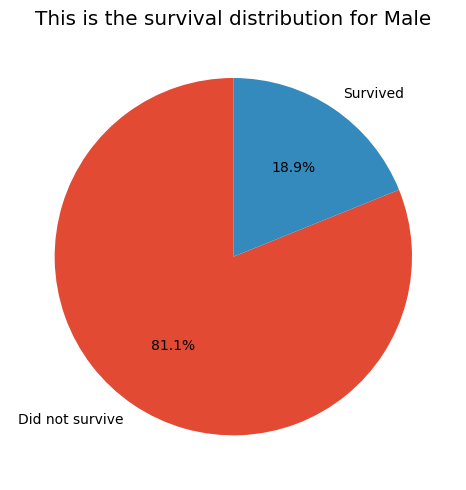

In [6]:
# Tried to make it so we use the already generated frequency_table

for gender in frequency_table.index:
    
    counts = frequency_table.loc[gender].values
    labels = frequency_table.columns
    
    plt.figure(figsize = (5,5))
    plt.pie(
        counts,
        labels = labels,
        autopct = "%1.1f%%",
        startangle = 90
    )
    plt.title(f"This is the survival distribution for {gender.capitalize()}")
    plt.tight_layout()
    plt.show()


In [11]:
# Making the pivot table here for mean survival rate by passenger class and sex

survival_pivot = titanic.pivot_table(
    values = "survived",
    index = "class",
    columns = "sex",
    aggfunc = "mean",
    observed = False
)

survival_pivot


sex,female,male
class,,
First,0.968085,0.368852
Second,0.921053,0.157407
Third,0.500000,0.135447


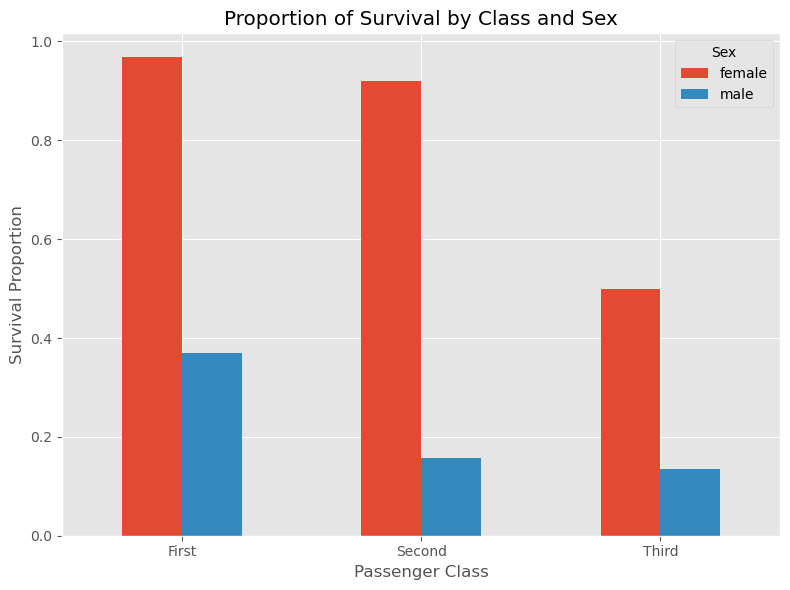

In [10]:
# Making the survival_pivot here for the bar chart

ax = survival_pivot.plot(
    kind = "bar",
    figsize = (8, 6)
)

plt.title("Proportion of Survival by Class and Sex")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Proportion")
plt.legend(title = "Sex")
plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()